In [1]:
!pip -q install torchsummary

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchsummary import summary

import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import sys

In [2]:
# Use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print(f"GPU {torch.cuda.get_device_name(0)} is available")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead")

No GPU available, using CPU instead


In [3]:
# Load the datasets
transforms = T.Compose([
#     T.Resize((224, 224)), 
#     T.CenterCrop(224),  These transformations have been applied already locally, see sampling_script.py
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_data = ImageFolder("data/test/", transform=transforms)

In [4]:
# Download pre-trained RESNET-18 model
resnet18 = torchvision.models.resnet18(weights='IMAGENET1K_V1')
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
resnet18.fc = nn.Linear(512, 2)

In [6]:
resnet18.load_state_dict(torch.load('models/resnet-18-oct-v1.pt', map_location=torch.device('cpu')))


<All keys matched successfully>

In [7]:
test_data.class_to_idx

{'ABNORMAL': 0, 'NORMAL': 1}

In [68]:
image, target = test_data[781]

Label: NORMAL


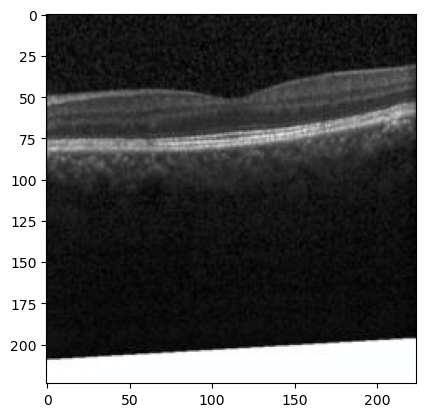

In [69]:
# Visualize a sample image
if target == 0:
    print(f"Label: ABNORMAL")
elif target == 1:
    print(f"Label: NORMAL")

# Define mean and std values used in normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Convert the tensor to a NumPy array
normalized_array = image.numpy()

# Transpose the array to have the channel dimension as the last axis
original_image = np.transpose(normalized_array, (1, 2, 0))

# Reverse normalization
original_image = (original_image * np.array(std)) + np.array(mean)

# Ensure pixel values are in the valid range [0, 1]
original_image = np.clip(original_image, 0, 1)

# Display the original image using Matplotlib
plt.imshow(original_image)
plt.show()

In [70]:
image = image.unsqueeze(dim=0)
image.shape

torch.Size([1, 3, 224, 224])

In [71]:
y_hat = resnet18(image)
y_hat

tensor([[ 0.2392, -0.3062]], grad_fn=<AddmmBackward0>)

In [72]:
def predict(image):
    y_hat = resnet18(image)
    pred = torch.argmax(y_hat)
    if pred == 0:
        print(f"ABNORMAL")
    elif pred == 1:
        print(f"NORMAL")

In [73]:
predict(image)

ABNORMAL
